# Twitter News Mood

- Data Analysis using news tweets posted on twitter by various news channels
- This analysis is based on 100 tweets from every news channel on twitter
- News channels 'BBC', 'CBS', 'CNN', 'FoxNews', 'NYTimes'

Import dependencies here

In [1]:
import tweepy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
from pprint import pprint
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
twitter_users = ['BBC', 'CBS', 'CNN', 'FoxNews', 'NYTimes']
number_of_tweets = 100

- Read tweets from various news channels on twitter and run sentiment analysis

In [4]:
user_tweets = {
    'user': [],
    'tweet': [],
    'tweet_time': [],
    'positive': [],
    'neutral': [],
    'negative': [],
    'compound': []
}

for user in twitter_users:
    public_tweets = api.user_timeline(user, count=number_of_tweets)
    for tweet in public_tweets:
        sentiment = analyzer.polarity_scores(tweet['text'])
        user_tweets['user'].append(user)
        user_tweets['positive'].append(sentiment['pos'])
        user_tweets['neutral'].append(sentiment['neu'])
        user_tweets['negative'].append(sentiment['neg'])
        user_tweets['compound'].append(sentiment['compound'])
        user_tweets['tweet'].append(tweet['text'])
        tweet_time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        user_tweets['tweet_time'].append(tweet_time)


In [5]:
user_tweets_df = pd.DataFrame(user_tweets)
user_tweets_df.to_csv('news_channels_tweets.csv', sep=',')
user_tweets_df

,compound,negative,neutral,positive,tweet,tweet_time,user
0,0.0000,0.000,1.000,0.000,🇮🇪 This 800-year-old hotel in Ireland is simpl...,2018-03-28 18:00:05+00:00,BBC
1,0.2960,0.000,0.891,0.109,📚 'Words do not live in dictionaries. They liv...,2018-03-28 17:00:12+00:00,BBC
2,-0.8225,0.312,0.688,0.000,The government rates the global outbreak of a ...,2018-03-28 16:30:00+00:00,BBC
3,0.0000,0.000,1.000,0.000,Slacking off in Dubai. https://t.co/a3oSKIxfSK,2018-03-28 16:00:10+00:00,BBC
4,0.7506,0.000,0.720,0.280,RT @BBCTheOneShow: The fantastic @george_ezra ...,2018-03-28 15:35:27+00:00,BBC
5,0.0000,0.000,1.000,0.000,"Two-thirds of drivers say they are ""regularly ...",2018-03-28 13:32:04+00:00,BBC
6,-0.3182,0.113,0.887,0.000,"The Masked Plumber is back. \nAnd this time, h...",2018-03-28 12:26:01+00:00,BBC
7,0.0000,0.000,1.000,0.000,RT @bbceurovision: We are starting a #Eurovisi...,2018-03-28 11:50:54+00:00,BBC
8,0.0000,0.000,1.000,0.000,"RT @BBCR1: ""Last night I did have a very, very...",2018-03-28 11:49:07+00:00,BBC
9,0.0000,0.000,1.000,0.000,RT @BBCRadio4: Listen to the first three episo...,2018-03-28 11:47:35+00:00,BBC


In [6]:
bbc_tweets_df = user_tweets_df[user_tweets_df['user'] == 'BBC']
cbs_tweets_df = user_tweets_df[user_tweets_df["user"] == "CBS"]
cnn_tweets_df = user_tweets_df[user_tweets_df["user"] == "CNN"]
foxnews_tweets_df = user_tweets_df[user_tweets_df["user"] == "FoxNews"]
nyt_tweets_df = user_tweets_df[user_tweets_df["user"] == "NYTimes"]

x_axis = [x_axis for x_axis in range(number_of_tweets)]

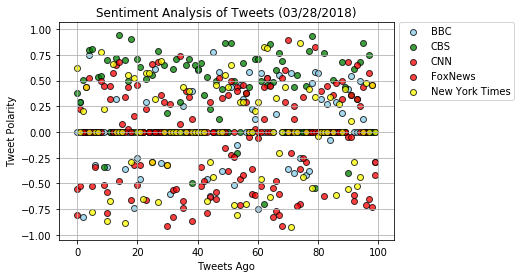

In [7]:
plt.scatter(x_axis, 
            bbc_tweets_df['compound'],
            label = "BBC",
            marker="o", 
            facecolors="skyblue", 
            edgecolors="black", 
            alpha=0.75)

plt.scatter(x_axis, 
            cbs_tweets_df['compound'],
            label = "CBS",
            marker="o", 
            facecolors="green", 
            edgecolors="black", 
            alpha=0.75)

plt.scatter(x_axis, 
            cnn_tweets_df['compound'],
            label = "CNN",
            marker="o", 
            facecolors="red", 
            edgecolors="black", 
            alpha=0.75)

plt.scatter(x_axis, 
            foxnews_tweets_df['compound'],
            label = "FoxNews",
            marker="o", 
            facecolors="red", 
            edgecolors="black", 
            alpha=0.75)

plt.scatter(x_axis, 
            nyt_tweets_df['compound'], 
            label = "New York Times",
            marker="o", 
            facecolors="yellow", 
            edgecolors="black", 
            alpha=0.75)

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Tweets (03/28/2018)")
plt.legend(loc='center left', bbox_to_anchor=(1,0.82))
plt.grid()
plt.savefig("news_sentiment_analysis.png",bbox_inches='tight')
plt.show()

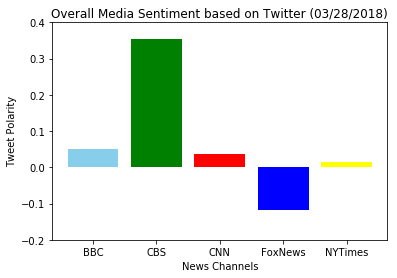

In [8]:
overall_sentiment = []
colors = ['skyblue', 'green', 'red', 'blue', 'yellow']

overall_sentiment.append(np.mean(bbc_tweets_df['compound']))
overall_sentiment.append(np.mean(cbs_tweets_df['compound']))
overall_sentiment.append(np.mean(cnn_tweets_df['compound']))
overall_sentiment.append(np.mean(foxnews_tweets_df['compound']))
overall_sentiment.append(np.mean(nyt_tweets_df['compound']))

plt.bar(twitter_users, overall_sentiment, color=colors)
plt.ylim(-0.20, 0.4)
plt.xlabel("News Channels")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment based on Twitter (03/28/2018)")
plt.savefig("overall_sentiment_analysis_tweet.png",bbox_inches='tight')
plt.show()

Insights:
  - Tweets posted on CBS new channel relatively has highest positive score
  - Tweets posted on Fox News channel appears to be more negative
  - Tweets posted on NYTimes new channel appears to be more of neutral topics